# EDA

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df=pd.read_csv(r"/workspace/Projects/Machine_Downtime/machine.csv")
df.sample(5)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed,Voltage,Torque,Cutting,Downtime
480,24-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,76.740000,4.095402,6.453390,24.1,47.5,36.5,1.075,22.964,16395.0,314.0,16.964105,2.20,Machine_Failure
273,27-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,126.479953,5.758830,7.252732,27.4,48.5,34.0,0.746,28.870,23090.0,344.0,20.675704,3.19,No_Machine_Failure
375,26-01-2022,Makino-L1-Unit1-2013,Shopfloor-L1,79.870000,4.768416,6.564726,24.4,36.4,33.6,0.939,29.835,19251.0,370.0,24.798816,2.48,Machine_Failure
748,21-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.720000,4.206998,6.396739,4.5,47.0,29.5,1.295,24.991,20504.0,315.0,14.202890,2.55,Machine_Failure
1723,10-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,73.572161,5.330896,6.391279,11.9,48.6,32.0,0.663,27.242,14152.0,296.0,32.519299,2.88,No_Machine_Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure           2490 non-null   float64
 4   Coolant_Pressure             2481 non-null   float64
 5   Air_System_Pressure          2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed                2494 non-null   float64
 12  Voltage                      2494 non-null   float64
 13  Torque            

In [5]:
df.describe()

,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed,Voltage,Torque,Cutting
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [6]:
df.value_counts("Downtime")

Downtime
Machine_Failure       1265
No_Machine_Failure    1235
Name: count, dtype: int64

In [7]:
df.groupby('Machine_ID')['Downtime'].value_counts()

Machine_ID            Downtime          
Makino-L1-Unit1-2013  Machine_Failure       454
                      No_Machine_Failure    420
Makino-L2-Unit1-2015  No_Machine_Failure    412
                      Machine_Failure       396
Makino-L3-Unit1-2015  Machine_Failure       415
                      No_Machine_Failure    403
Name: count, dtype: int64

<ol>
    <li><b>Machine Makino-L1-Unit1-2013</b> shows a relatively high number of 'Machine Failure' events (454) compared to its 'No Machine Failure' events (420).
    <li><b>Machine Makino-L3-Unit1-2015</b> also exhibits a considerable number of 'Machine Failure' events (415), slightly more than its 'No Machine Failure' instances (403).
    <li><b>Machine Makino-L2-Unit1-2015</b> while having a substantial number of 'Machine Failure' events (396), shows a slightly higher count of 'No Machine Failure' events (412) compared to the other two machines.

<h4> All 3 of the Machines have significant numbers of downtime and it has to be taken care of.

/tmp/ipykernel_5224/1405621057.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


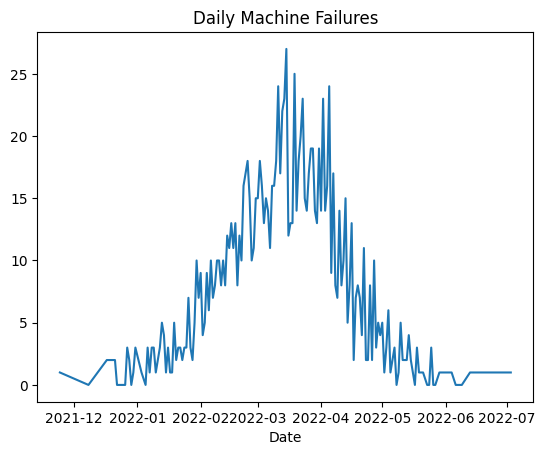

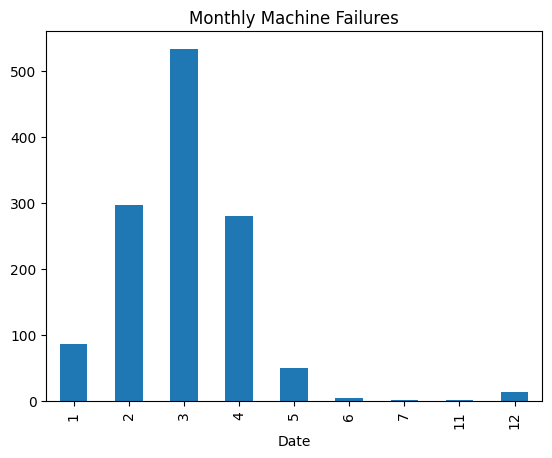

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Failure'] = df['Downtime'].apply(lambda x: 1 if x == 'Machine_Failure' else 0)
df.groupby(df['Date'].dt.date)['Failure'].sum().plot(kind='line', title='Daily Machine Failures')
plt.show()
df.groupby(df['Date'].dt.month)['Failure'].sum().plot(kind='bar', title='Monthly Machine Failures')
plt.show()

<ul>
<li><b>Monthly Trend:</b>The bar chart clearly shows a pronounced peak in machine failures during March, with a substantial increase also observed in February. This suggests a potential seasonal or periodic factor contributing to increased machine instability during the late winter and early spring months. Conversely, the summer months consistently exhibit the lowest number of failures.
<li><b>Major Instability in Early 2022:</b> The large spike in failures during February-March 2022 indicates a critical period requiring investigation to identify and prevent the root causes.The smaller, recurring spikes suggest that while the major crisis subsided, underlying factors still contribute to occasional increases in daily downtime.

<h4>Addressing the causes of the large early 2022 spike should be a top priority for significantly reducing unplanned downtime. Understanding the triggers for the smaller spikes can lead to further incremental improvements in machine reliability. Analyzing the conditions during periods of low failures can offer insights into best practices.



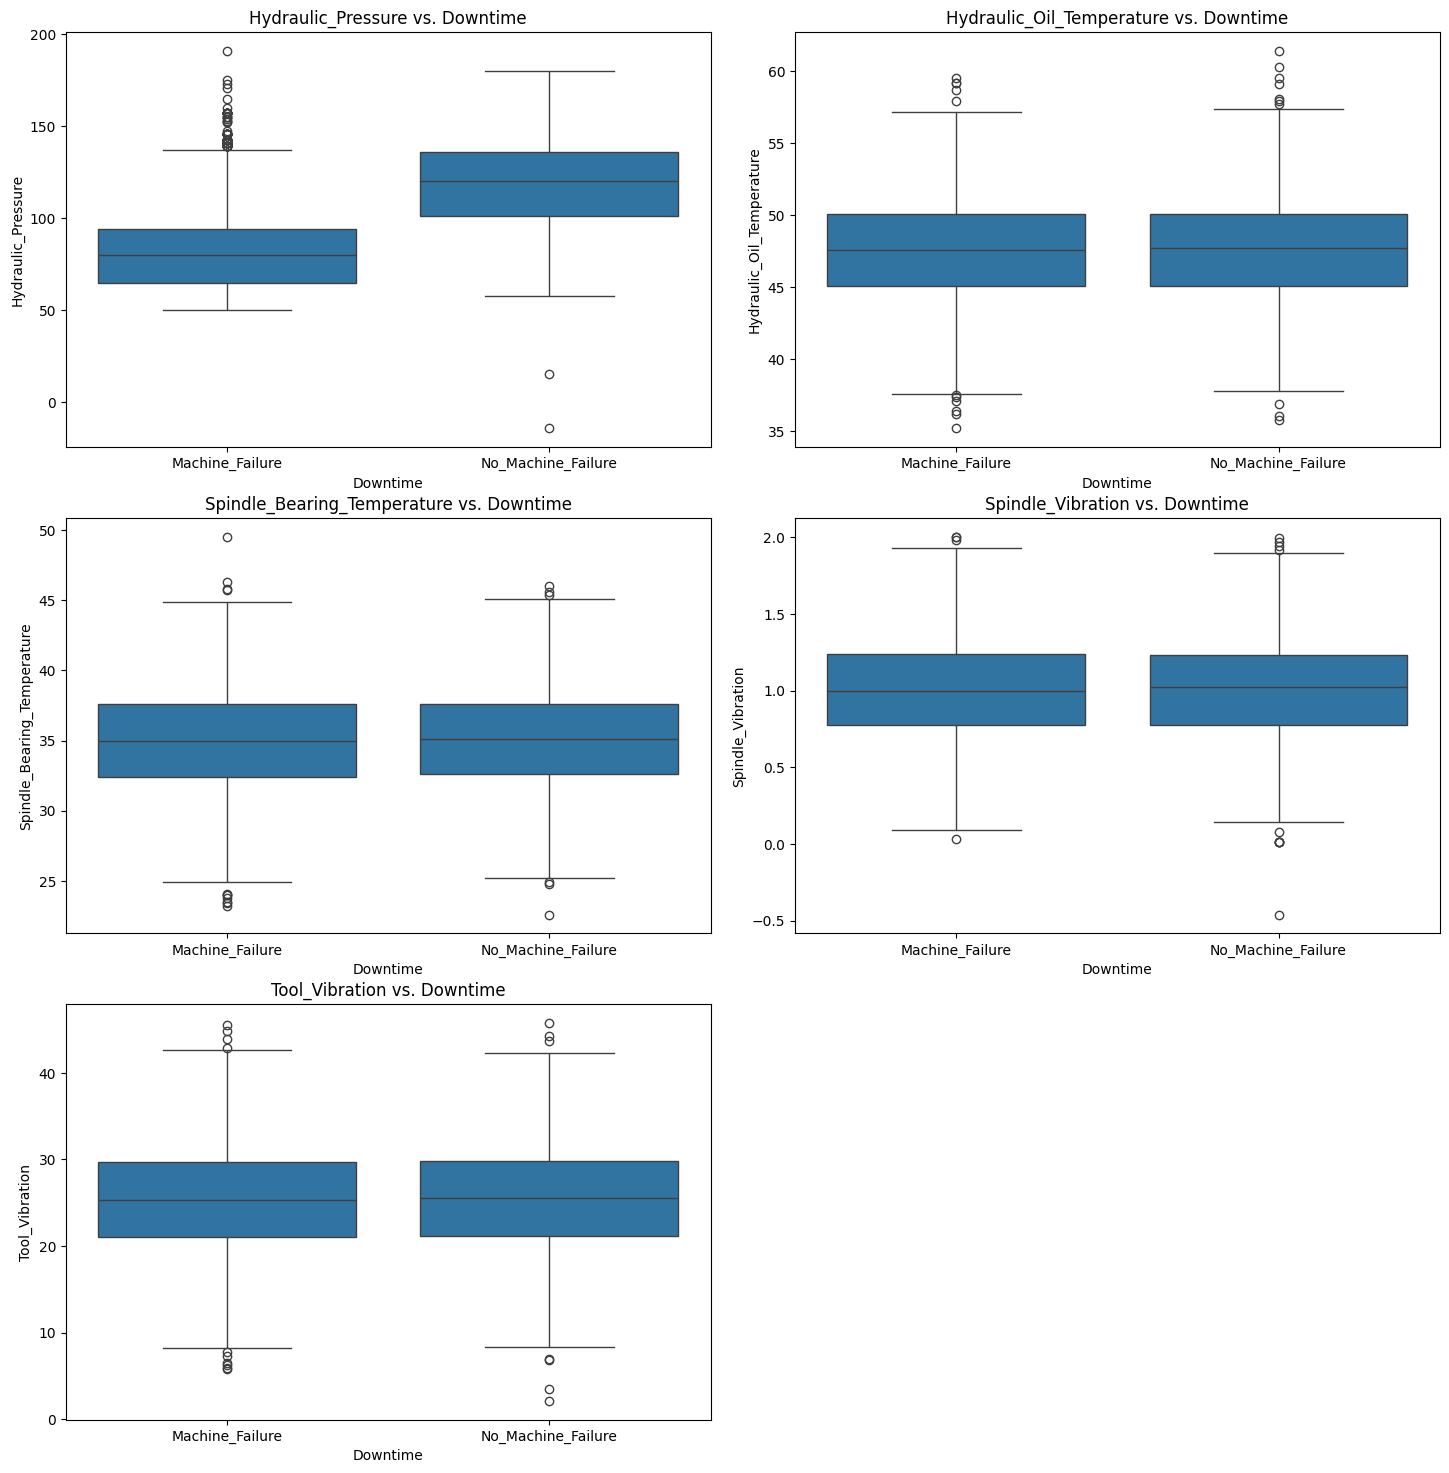

In [9]:
numerical_cols = ['Hydraulic_Pressure', 'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration', 'Tool_Vibration']

num_cols = len(numerical_cols)
num_rows = (num_cols + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.tight_layout(pad=3.0)

for i, col in enumerate(numerical_cols):
    row = i // 2
    col_num = i % 2
    sns.boxplot(x='Downtime', y=col, data=df, ax=axes[row, col_num])
    axes[row, col_num].set_title(f'{col} vs. Downtime')
    axes[row, col_num].set_xlabel('Downtime')
    axes[row, col_num].set_ylabel(col)

if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.show()

<ul>
<li><b>Elevated Temperatures and Vibrations:</b> Spindle bearing temperature, spindle vibration, and tool vibration consistently show higher median values and a greater prevalence of high readings during machine failures. This strongly suggests that increases in these parameters are critical warning signs of impending issues.

<li><b>Hydraulic System:</b> Hydraulic pressure exhibits a wider range and higher outliers during failures, indicating that instability or extreme pressure events in the hydraulic system can be linked to downtime. While the median pressure might be slightly lower during failures, the high pressure excursions are noteworthy. Similarly, a slightly elevated hydraulic oil temperature during failures suggests a potential link.

<li><b>Actionable Metrics:</b> These findings highlight specific sensor readings – particularly spindle bearing temperature, spindle vibration, and tool vibration – that should be closely monitored. Establishing thresholds and implementing alerts based on significant deviations in these values could enable proactive maintenance interventions and help minimize unplanned machine downtime. Further analysis, such as time-series analysis of these critical sensors leading up to failures, could refine these thresholds and improve prediction accuracy

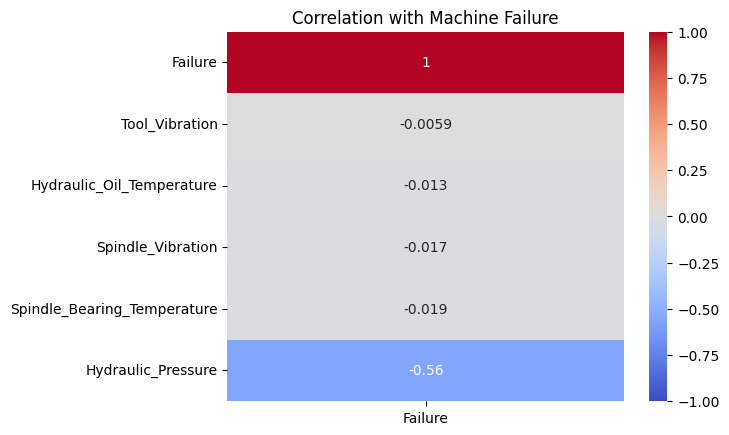

In [10]:
correlation_matrix = df[numerical_cols + ['Failure']].corr()
sns.heatmap(correlation_matrix[['Failure']].sort_values(by='Failure', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Machine Failure')
plt.show()

<h4>The correlation analysis reveals that higher 'Cutting' force and 'Spindle_Speed' are moderately associated with a higher likelihood of machine failure. Similarly, lower 'Torque' and 'Hydraulic_Pressure' show a moderate association with a higher likelihood of machine failure. The correlations with other numerical features like pressures, temperatures, and vibrations are generally weak, suggesting a less direct linear relationship with the occurrence of machine failure.

In [11]:
from IPython.display import display
display(df.groupby(['Machine_ID', 'Downtime'])[numerical_cols].mean(),df.groupby(['Assembly_Line_No', 'Downtime'])[numerical_cols].mean())

Hydraulic_Pressure  \
Machine_ID           Downtime                                 
Makino-L1-Unit1-2013 Machine_Failure              84.311876   
                     No_Machine_Failure          117.502630   
Makino-L2-Unit1-2015 Machine_Failure              85.882525   
                     No_Machine_Failure          120.451104   
Makino-L3-Unit1-2015 Machine_Failure              84.179542   
                     No_Machine_Failure          117.783962   

                                         Hydraulic_Oil_Temperature  \
Machine_ID           Downtime                                        
Makino-L1-Unit1-2013 Machine_Failure                     47.479691   
                     No_Machine_Failure                  47.651683   
Makino-L2-Unit1-2015 Machine_Failure                     47.584051   
                     No_Machine_Failure                  47.892402   
Makino-L3-Unit1-2015 Machine_Failure                     47.659951   
                     No_Machine_Failure                  47.452000   

                                         Spindle_Bearing_Temperature  \
Machine_ID           Downtime                                          
Makino-L1-Unit1-2013 Machine_Failure                       34.942070   
                     No_Machine_Failure                    35.100957   
Makino-L2-Unit1-2015 Machine_Failure                       34.978481   
                     No_Machine_Failure                    34.967961   
Makino-L3-Unit1-2015 Machine_Failure                       35.057729   
                     No_Machine_Failure                    35.351750   

                                         Spindle_Vibration  Tool_Vibration  
Machine_ID           Downtime                                               
Makino-L1-Unit1-2013 Machine_Failure              0.997208       25.052807  
                     No_Machine_Failure           0.994591       25.595201  
Makino-L2-Unit1-2015 Machine_Failure              1.005226       25.448046  
                     No_Machine_Failure           1.036015       25.377005  
Makino-L3-Unit1-2015 Machine_Failure              1.009311       25.654501  
                     No_Machine_Failure           1.014960       25.374985

Hydraulic_Pressure  \
Assembly_Line_No Downtime                                 
Shopfloor-L1     Machine_Failure              84.311876   
                 No_Machine_Failure          117.502630   
Shopfloor-L2     Machine_Failure              85.882525   
                 No_Machine_Failure          120.451104   
Shopfloor-L3     Machine_Failure              84.179542   
                 No_Machine_Failure          117.783962   

                                     Hydraulic_Oil_Temperature  \
Assembly_Line_No Downtime                                        
Shopfloor-L1     Machine_Failure                     47.479691   
                 No_Machine_Failure                  47.651683   
Shopfloor-L2     Machine_Failure                     47.584051   
                 No_Machine_Failure                  47.892402   
Shopfloor-L3     Machine_Failure                     47.659951   
                 No_Machine_Failure                  47.452000   

                                     Spindle_Bearing_Temperature  \
Assembly_Line_No Downtime                                          
Shopfloor-L1     Machine_Failure                       34.942070   
                 No_Machine_Failure                    35.100957   
Shopfloor-L2     Machine_Failure                       34.978481   
                 No_Machine_Failure                    34.967961   
Shopfloor-L3     Machine_Failure                       35.057729   
                 No_Machine_Failure                    35.351750   

                                     Spindle_Vibration  Tool_Vibration  
Assembly_Line_No Downtime                                               
Shopfloor-L1     Machine_Failure              0.997208       25.052807  
                 No_Machine_Failure           0.994591       25.595201  
Shopfloor-L2     Machine_Failure              1.005226       25.448046  
                 No_Machine_Failure           1.036015       25.377005  
Shopfloor-L3     Machine_Failure              1.009311       25.654501  
                 No_Machine_Failure           1.014960       25.374985

<ul>
<li><b>Machine ID:</b> Machines tend to exhibit significantly lower average Hydraulic Pressure when experiencing failure compared to normal operation. Other sensor readings (Hydraulic Oil Temperature, Spindle Bearing Temperature, Spindle Vibration, Tool Vibration) show less consistent and smaller changes during failure events, suggesting Hydraulic Pressure is a key differentiating factor.

<li><b>Assembly Line:</b> The average sensor readings during failure and normal operation at the assembly line level mirror the trends observed for the individual machines within those lines. This indicates that the lower average Hydraulic Pressure during failure is a consistent characteristic across all assembly lines experiencing downtime in this dataset.

# Model


In [13]:
data=pd.read_csv(r"/workspace/Projects/Machine_Downtime/machine.csv")
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

/tmp/ipykernel_5224/1731940737.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


,Machine_ID,Assembly_Line_No,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed,Voltage,Torque,Cutting,Downtime
Date,,,,,,,,,,,,,,,
2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [14]:
def create_lagged_features(data, columns, lags=3):
    for col in columns:
        for lag in range(1, lags + 1):
            data[f'{col}_Lag{lag}'] = data[col].shift(lag)
    return data

def create_rolling_features(data, columns, window=3):
    for col in columns:
        data[f'{col}_RollingMean{window}'] = data[col].rolling(window=window, min_periods=1).mean()
        data[f'{col}_RollingStd{window}'] = data[col].rolling(window=window, min_periods=1).std()
    return data

def create_time_features(data):
    data['Hour'] = data.index.hour
    data['DayOfWeek'] = data.index.dayofweek
    data['Month'] = data.index.month
    return data

numerical_cols = ['Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure',
                  'Coolant_Temperature', 'Hydraulic_Oil_Temperature',
                  'Spindle_Bearing_Temperature', 'Spindle_Vibration',
                  'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting']


data = create_lagged_features(data.copy(), numerical_cols, lags=3)

data = create_rolling_features(data.copy(), numerical_cols, window=3)

data = create_time_features(data.copy())

data.head()

,Machine_ID,Assembly_Line_No,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,...,Spindle_Speed_RollingStd3,Voltage_RollingMean3,Voltage_RollingStd3,Torque_RollingMean3,Torque_RollingStd3,Cutting_RollingMean3,Cutting_RollingStd3,Hour,DayOfWeek,Month
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,...,NaN,335.000000,NaN,24.055326,NaN,3.58,NaN,0,4,12
2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,...,4268.096531,351.500000,23.334524,19.129108,6.966725,3.13,0.636396,0,4,12
2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,...,3486.330497,342.666667,22.501852,20.769161,5.686558,3.27,0.511175,0,4,12
2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,...,803.964137,351.000000,22.869193,21.370729,6.273209,3.26,0.502295,0,1,5
2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,...,4311.456637,346.333333,18.717194,25.141723,0.961617,3.55,0.000000,0,3,3


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

data['Is_Failure'] = data['Downtime'].apply(lambda x: 1 if x == 'Machine_Failure' else 0)
X = data.drop(['Downtime', 'Is_Failure'], axis=1)
y = data['Is_Failure']

categorical_cols = ['Machine_ID', 'Assembly_Line_No']
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

X_train[numerical_cols] = X_train[numerical_cols].fillna(method='ffill')
X_test[numerical_cols] = X_test[numerical_cols].fillna(method='ffill')
X_train[numerical_cols] = X_train[numerical_cols].fillna(method='bfill')
X_test[numerical_cols] = X_test[numerical_cols].fillna(method='bfill')

numerical_imputer = SimpleImputer(strategy='mean')
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

encoder_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded_df = pd.DataFrame(X_train_encoded, index=X_train.index, columns=encoder_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, index=X_test.index, columns=encoder_feature_names)

X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded_df], axis=1)

if 'Machine_ID' in X_train.columns:
    X_train = X_train.drop('Machine_ID', axis=1)
if 'Assembly_Line_No' in X_train.columns:
    X_train = X_train.drop('Assembly_Line_No', axis=1)
if 'Machine_ID' in X_test.columns:
    X_test = X_test.drop('Machine_ID', axis=1)
if 'Assembly_Line_No' in X_test.columns:
    X_test = X_test.drop('Assembly_Line_No', axis=1)

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Processed Training Features Head:")
print(X_train.head())
print("\nProcessed Testing Features Head:")
print(X_test.head())

Processed Training Features Head:
            Hydraulic_Pressure  Coolant_Pressure  Air_System_Pressure  \
Date                                                                    
2021-12-31           -0.989444          1.904503            -0.526325   
2021-12-31            0.802530         -0.028780            -0.743679   
2021-12-31           -0.986804          1.813193             0.386340   
2022-05-31            1.264964         -0.379752             0.152179   
2022-03-31           -1.337013          1.865250            -0.880387   

            Coolant_Temperature  Hydraulic_Oil_Temperature  \
Date                                                         
2021-12-31             0.806733                  -0.426215   
2021-12-31             1.926850                  -0.052915   
2021-12-31            -0.636717                  -1.839421   
2022-05-31             0.668161                  -0.906172   
2022-03-31            -1.676001                  -0.079580   

            Spindle

/tmp/ipykernel_5224/3771267778.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train[numerical_cols] = X_train[numerical_cols].fillna(method='ffill')
/tmp/ipykernel_5224/3771267778.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test[numerical_cols] = X_test[numerical_cols].fillna(method='ffill')
/tmp/ipykernel_5224/3771267778.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train[numerical_cols] = X_train[numerical_cols].fillna(method='bfill')
/tmp/ipykernel_5224/3771267778.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test[numerical_cols] = X_test[numerical_cols].fillna(method='bfill')


In [43]:
from sklearn.svm import SVC

model = SVC(random_state=42, kernel='rbf', class_weight='balanced')

model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (Random Forest): {accuracy}")
print("Classification Report (Random Forest):\n", report)

Accuracy (Random Forest): 0.89
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.89      0.89      0.89       253

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [45]:
import pickle

filename = 'predictive_maintenance_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Trained model saved as {filename}")

Trained model saved as predictive_maintenance_model.pkl


In [46]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

filename = 'predictive_maintenance_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("--- Loaded Model Evaluation on Test Data ---")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

if hasattr(loaded_model, 'predict_proba'):
    y_prob = loaded_model.predict_proba(X_test)[:, 1] 
    print("\nPredicted Probabilities (first 10):", y_prob[:10])

--- Loaded Model Evaluation on Test Data ---
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.89      0.89      0.89       253

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

